In [1]:
import numpy as np
import pandas as pd
import datetime
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
account = pd.read_csv("archive/account.csv", sep = ';')
card = pd.read_csv("archive/card.csv", sep = ';')
client = pd.read_csv("archive/client.csv", sep = ';')
disp = pd.read_csv("archive/disp.csv", sep=";")


In [3]:
# Starting and end dates
start_date = datetime.datetime(1993,1,1)
end_date = datetime.datetime(1999,1,1)

In [4]:
# function to convert a date to (days after start_date)
def convert_date_to_days(x):
    td = x - start_date
    return td.days

In [5]:
# function to convert a date to age at end_date
def convert_to_age_days(x):
    td = end_date - x
    return td.days

In [6]:
#Converting the Card issued date to a datetime object

card['issued'] = pd.to_datetime(card['issued'].str[:6], format='%y%m%d')

# check the date column for null values

card['issued']

0     1993-11-07
1     1994-01-19
2     1994-02-05
3     1994-02-08
4     1994-02-15
         ...    
887   1998-12-26
888   1998-12-28
889   1998-12-28
890   1998-12-29
891   1998-12-29
Name: issued, Length: 892, dtype: datetime64[ns]

In [7]:
# check the date column for null values

card['issued'].isnull().sum()

0

In [8]:
#Convert the card issued date to days in number
card['card_issued_date'] = card['issued'].map(convert_date_to_days)
del card['issued']

In [9]:
client

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5
...,...,...,...
5364,13955,456030,1
5365,13956,430406,1
5366,13968,680413,61
5367,13971,626019,67


In [10]:
# functions to convert the format of the birth_number.

# returns the middle two digits

def get_mid2_dig(x):
    return int(x/100) % 100

# returns the month of birth_number column.
def get_month(x):
    mth = get_mid2_dig(x)
    if mth > 50:
        return mth - 50
    else:
        return mth

# return the month (of birth_number)
def get_day(x):
    return x % 100

# returns the year (of birth_number)
def get_year(x):
    return int(x/10000)

# determine the gender 
def get_gender(x):
    mth = get_mid2_dig(x)
    if mth > 50:
        return 'F'
    else:
        return 'M'

# convert the birth_number into date
def convert_int_to_date(x):
    yr = get_year(x) + 1900
    mth = get_month(x)
    day = get_day(x)
    return datetime.datetime(yr, mth, day)

# convert birth_number into age.
def convert_birthday_to_age(x):
    yr = get_year(x) + 1900
    mth = get_month(x)
    day = get_day(x)
    return convert_to_age_days(datetime.datetime(yr,mth,day))/365
    
client['client_age'] = client['birth_number'].map(convert_birthday_to_age)
client['client_gender'] = client['birth_number'].map(get_gender)
del client['birth_number']

In [11]:
client

,client_id,district_id,client_age,client_gender
0,1,18,28.071233,F
1,2,1,53.942466,M
2,3,1,58.268493,F
3,4,5,42.112329,M
4,5,5,38.523288,F
...,...,...,...,...
5364,13955,1,53.208219,F
5365,13956,1,55.778082,M
5366,13968,61,30.739726,M
5367,13971,67,36.227397,F


In [12]:
# rename columns in Card
card = card.rename(columns={'type': 'card_type'})
card.head()

,card_id,disp_id,card_type,card_issued_date
0,1005,9285,classic,310
1,104,588,classic,383
2,747,4915,classic,400
3,70,439,classic,403
4,577,3687,classic,410


In [14]:
# Rename columns in Client dataset.
client = client.rename(columns={'district_id': 'client_district_id'})
client.head()

,client_id,client_district_id,client_age,client_gender
0,1,18,28.071233,F
1,2,1,53.942466,M
2,3,1,58.268493,F
3,4,5,42.112329,M
4,5,5,38.523288,F


In [15]:
# Export the cleaned Client Data set
client.to_csv("cleaned_client.csv", index=False)

In [16]:
# Renaming columns for Account
account = account.rename(columns={'district_id': 'account_district_id'})

account.head()

,account_id,account_district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [17]:
#Converting date columns in the Account table
account['date'] = account['date'].map(convert_int_to_date)
account['account_date_opened'] = account['date'].map(convert_date_to_days)
del account['date']

account

,account_id,account_district_id,frequency,account_date_opened
0,576,55,POPLATEK MESICNE,0
1,3818,74,POPLATEK MESICNE,0
2,704,55,POPLATEK MESICNE,0
3,2378,16,POPLATEK MESICNE,0
4,2632,24,POPLATEK MESICNE,1
...,...,...,...,...
4495,124,55,POPLATEK MESICNE,1822
4496,3958,59,POPLATEK MESICNE,1822
4497,777,30,POPLATEK MESICNE,1822
4498,1573,63,POPLATEK MESICNE,1823


In [18]:
#Checking the frequency ofAccount table
account['frequency'].value_counts() # the unique values that occours in the table 

frequency
POPLATEK MESICNE      4167
POPLATEK TYDNE         240
POPLATEK PO OBRATU      93
Name: count, dtype: int64

In [19]:
# Translate frequency of transactions to English.
def convert_freq_to_eng(x):
    if x == 'POPLATEK MESICNE':
        return 'MONTHLY'
    elif x == 'POPLATEK TYDNE':
        return 'WEEKLY'
    elif x == 'POPLATEK PO OBRATU':
        return 'TRANSACTION'
    else:
        return 'UNKNOWN'
    
account['frequency'] = account['frequency'].map(convert_freq_to_eng) # replace the values in the series with newly data

In [20]:
# Renaming columns for Account

account = account.rename(columns={'frequency': 'statement_freq'})
account.head()

,account_id,account_district_id,statement_freq,account_date_opened
0,576,55,MONTHLY,0
1,3818,74,MONTHLY,0
2,704,55,MONTHLY,0
3,2378,16,MONTHLY,0
4,2632,24,MONTHLY,1


In [21]:
# Export the cleaned Account Data set
account.to_csv("cleaned_account.csv", index=False)

In [22]:
# Export the cleaned Card Data set
card.to_csv("cleaned_card.csv", index=False)

(array([  6., 150., 426., 345., 387., 358., 382., 372., 344., 371., 372.,
        392., 367., 254., 205., 189., 186., 185.,  66.,  12.]),
 array([11.27123288, 15.0790411 , 18.88684932, 22.69465753, 26.50246575,
        30.31027397, 34.11808219, 37.92589041, 41.73369863, 45.54150685,
        49.34931507, 53.15712329, 56.96493151, 60.77273973, 64.58054795,
        68.38835616, 72.19616438, 76.0039726 , 79.81178082, 83.61958904,
        87.42739726]),
 <BarContainer object of 20 artists>)

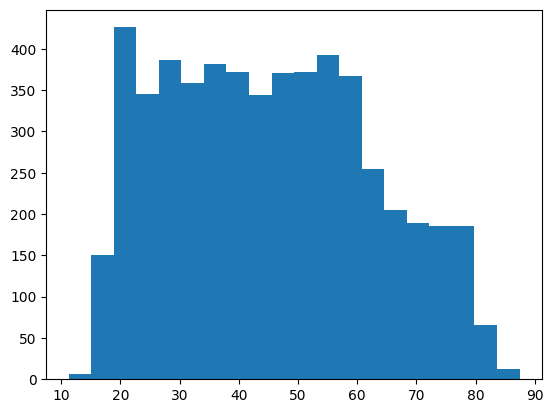

In [23]:
#Plotting age of clients
plt.hist(client['client_age'], 20)

array([<Axes: title={'center': 'count'}, xlabel='client_gender'>],
      dtype=object)

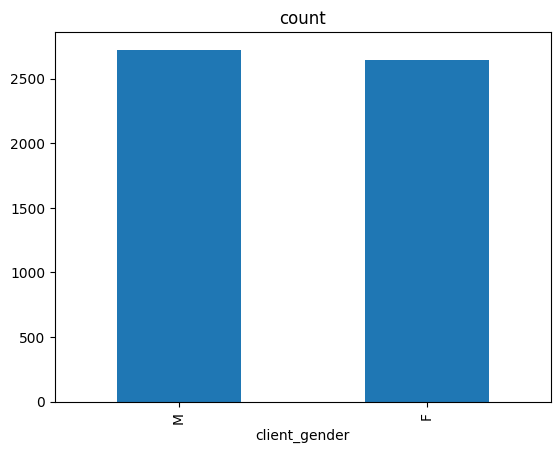

In [24]:
#Plotting gender of clients
client['client_gender'].value_counts().plot(kind='bar', subplots=True)

In [25]:
loan = pd.read_csv('archive/loan.csv', sep=';')

In [26]:
loan

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A
...,...,...,...,...,...,...,...
677,4989,105,981205,352704,48,7348.0,C
678,5221,1284,981205,52512,12,4376.0,C
679,6402,6922,981206,139488,24,5812.0,C
680,5346,1928,981206,55632,24,2318.0,C


In [27]:
# 'A' stands for contract finished, no problems,

# 'B' stands for contract finished, loan not payed,

# 'C' stands for running contract, OK so far,

# 'D' stands for running contract, client in debt

In [28]:
disp

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT
...,...,...,...,...
5364,13647,13955,11349,OWNER
5365,13648,13956,11349,DISPONENT
5366,13660,13968,11359,OWNER
5367,13663,13971,11362,OWNER


In [29]:
disp.to_csv("cleaned_disp.csv", index=False)

In [30]:
loan.to_csv("cleaned_loan.csv", index=False)

In [31]:
district = pd.read_csv("archive/district.csv", sep=(";"))

In [32]:
district = district.rename(columns={'A1': 'district_id', 
                                    'A2': 'district name',
                                    'A3': 'region',
                                    'A4': 'no of inhabitants',
                                    'A5': 'no. of municipalities with inhabitants < 499',
                                    'A6': 'no. of municipalities with inhabitants 500-1999',
                                    'A7': 'no. of municipalities with inhabitants 2000-9999',
                                    'A8': 'no. of municipalities with inhabitants > 10000',
                                    'A9': 'no. of cities',
                                    'A10': 'ratio of urban inhabitants',
                                    'A11': 'average salary',
                                    'A12': 'unemploymant rate 95',
                                    'A13': 'unemploymant rate 96',
                                    'A14': 'no. of enterpreneurs per 1000 inhabitantS',
                                    'A15': 'no. of commited crimes 95',
                                    'A16': 'no. of commited crimes 96'})

In [33]:
district.to_csv("cleaned_district.csv", index=False)

In [34]:
district

,district_id,district name,region,no of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants > 10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate 95,unemploymant rate 96,no. of enterpreneurs per 1000 inhabitantS,no. of commited crimes 95,no. of commited crimes 96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Opava,north Moravia,182027,17,49,12,2,7,56.4,8746,3.33,3.74,90,4355,4433
73,74,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,4.75,5.44,100,18782,18347
74,75,Prerov,north Moravia,138032,67,30,4,2,5,64.6,8819,5.38,5.66,99,4063,4505
75,76,Sumperk,north Moravia,127369,31,32,13,2,7,51.2,8369,4.73,5.88,107,3736,2807


In [35]:
trans = pd.read_csv('archive/trans.csv', sep=';', low_memory=False)

In [36]:
def convert_trans_type_to_eng(x):
    if x == 'PRIJEM':
        return 'Credit'
    elif x == 'VYDAJ':
        return 'Withdrawal'
    else:
        return np.NaN

def convert_trans_op_to_eng(x):
    if x == 'VYBER KARTOU':
        return 'Credit card withdrawal'
    elif x == 'VKLAD':
        return 'Credit in cash'
    elif x == 'PREVOD Z UCTU':
        return 'Collection from another bank'
    elif x == 'VYBER':
        return 'Withdrawal in Cash'
    elif x == 'PREVOD NA UCET':
        return 'Remittance to another bank'    
    else:
        return np.NaN

def convert_trans_k_symbol_to_eng(x):
    if x == 'POJISTNE':
        return 'Insurance payment'
    elif x == 'SLUZBY':
        return 'Payment for statement'
    elif x == 'UROK':
        return 'Interest credited'
    elif x == 'SANKC. UROK':
        return 'Sanction interest if negative balance'
    elif x == 'SIPO':
        return 'Household'
    elif x == 'DUCHOD':
        return 'Old-age pension'  
    elif x == 'UVER':
        return 'Loan payment'      
    else:
        return np.NaN

In [37]:
# use map to apply above functions to type, operation, amount columns
trans['trans_type'] = trans['type'].map(convert_trans_type_to_eng)
trans['trans_operation'] = trans['operation'].map(convert_trans_op_to_eng)
trans['trans_k_symbol'] = trans['k_symbol'].map(convert_trans_k_symbol_to_eng)

In [38]:
# drop original columns after modified
trans=trans.drop(['type', 'operation','k_symbol'], axis=1)

In [39]:
# converts the date into a proper date format
trans['date'] = pd.to_datetime(trans['date'], format='%y%m%d')

In [40]:
# rename the column names as per remarks
trans = trans.rename(columns={'amount': 'trans_amount',
                              'balance':'balance_after_trans',
                              'bank':'trans_bank_partner',
                              'account':'trans_account_partner'})

In [41]:

trans.to_csv('cleaned_trans.csv', index=False) 

In [42]:
order = pd.read_csv('archive/order.csv', sep=';')

In [43]:
def convert_order_k_symbol_to_eng(x):
    if x == 'POJISTNE':
        return 'Insurance payment'
    elif x == 'SIPO':
        return 'Household'
    elif x == 'LEASING':
        return 'Leasing'
    elif x == 'UVER':
        return 'Loan payment'
    else:
        return np.NaN

In [44]:
order['order_k_symbol'] = order['k_symbol'].map(convert_order_k_symbol_to_eng)

In [45]:
order=order.drop(['k_symbol'], axis=1)

In [46]:
order = order.rename(columns={'bank_to': 'order_recipient_bank',
                              'account_to':'order_recipient_account',
                              'amount':'order_amount'})

In [47]:
order.to_csv('cleaned_order.csv', index=False) 

In [56]:
df = pd.read_csv('df_merged.csv', sep=',', low_memory=False)

In [57]:
df.head()

,client_id,client_district_id,client_age,client_gender,disp_id,account_id,type,trans_id,date,trans_amount,...,no._of_municipalities_with_inhabitants_2000-9999,no._of_municipalities_with_inhabitants_>_10000,no._of_cities,ratio_of_urban_inhabitants,average_salary,unemploymant_rate_95,unemploymant_rate_96,no._of_enterpreneurs_per_1000_inhabitantS,no._of_commited_crimes_95,no._of_commited_crimes_96
0,1,18,28.071233,F,1,1,OWNER,1,1995-03-24,1000.0,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
1,1,18,28.071233,F,1,1,OWNER,5,1995-04-13,3679.0,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
2,1,18,28.071233,F,1,1,OWNER,199,1995-04-23,12600.0,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
3,1,18,28.071233,F,1,1,OWNER,3530438,1995-04-30,19.2,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
4,1,18,28.071233,F,1,1,OWNER,6,1995-05-13,3679.0,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910


In [58]:
order.head()

,order_id,account_id,order_recipient_bank,order_recipient_account,order_amount,order_k_symbol
0,29401,1,YZ,87144583,2452.0,Household
1,29402,2,ST,89597016,3372.7,Loan payment
2,29403,2,QR,13943797,7266.0,Household
3,29404,3,WX,83084338,1135.0,Household
4,29405,3,CD,24485939,327.0,NaN


In [59]:
trans

,trans_id,account_id,date,trans_amount,balance_after_trans,trans_bank_partner,trans_account_partner,trans_type,trans_operation,trans_k_symbol
0,695247,2378,1993-01-01,700.0,700.0,NaN,NaN,Credit,Credit in cash,NaN
1,171812,576,1993-01-01,900.0,900.0,NaN,NaN,Credit,Credit in cash,NaN
2,207264,704,1993-01-01,1000.0,1000.0,NaN,NaN,Credit,Credit in cash,NaN
3,1117247,3818,1993-01-01,600.0,600.0,NaN,NaN,Credit,Credit in cash,NaN
4,579373,1972,1993-01-02,400.0,400.0,NaN,NaN,Credit,Credit in cash,NaN
...,...,...,...,...,...,...,...,...,...,...
1056315,3626622,2906,1998-12-31,62.3,13729.4,NaN,NaN,Credit,NaN,Interest credited
1056316,3627616,2935,1998-12-31,81.3,19544.9,NaN,NaN,Credit,NaN,Interest credited
1056317,3625403,2869,1998-12-31,60.2,14638.2,NaN,NaN,Credit,NaN,Interest credited
1056318,3626683,2907,1998-12-31,107.5,23453.0,NaN,NaN,Credit,NaN,Interest credited


In [61]:
df.dtypes

client_id                                             int64
client_district_id                                    int64
client_age                                          float64
client_gender                                        object
disp_id                                               int64
account_id                                            int64
type                                                 object
trans_id                                              int64
date                                                 object
trans_amount                                        float64
balance_after_trans                                 float64
trans_bank_partner                                   object
trans_account_partner                               float64
trans_type                                           object
trans_operation                                      object
trans_k_symbol                                       object
order_id                                

In [63]:
df = df.drop(["client_gender", "type", "date", 
              "trans_bank_partner", "trans_type",
              "trans_operation", "trans_k_symbol",
              "order_recipient_bank", "order_k_symbol",
              "statement_freq", "status", "card_type",
              "district_name", "region", "unemploymant_rate_95",
              "no._of_commited_crimes_95"], axis=1)

In [64]:
df.head()

,client_id,client_district_id,client_age,disp_id,account_id,trans_id,trans_amount,balance_after_trans,trans_account_partner,order_id,...,no._of_municipalities_with_inhabitants_<_499,no._of_municipalities_with_inhabitants_500-1999,no._of_municipalities_with_inhabitants_2000-9999,no._of_municipalities_with_inhabitants_>_10000,no._of_cities,ratio_of_urban_inhabitants,average_salary,unemploymant_rate_96,no._of_enterpreneurs_per_1000_inhabitantS,no._of_commited_crimes_96
0,1,18,28.071233,1,1,1,1000.0,1000.0,NaN,29401.0,...,60,13,2,1,4,65.3,8968,3.35,131,1910
1,1,18,28.071233,1,1,5,3679.0,4679.0,41403269.0,29401.0,...,60,13,2,1,4,65.3,8968,3.35,131,1910
2,1,18,28.071233,1,1,199,12600.0,17279.0,NaN,29401.0,...,60,13,2,1,4,65.3,8968,3.35,131,1910
3,1,18,28.071233,1,1,3530438,19.2,17298.2,NaN,29401.0,...,60,13,2,1,4,65.3,8968,3.35,131,1910
4,1,18,28.071233,1,1,6,3679.0,20977.2,41403269.0,29401.0,...,60,13,2,1,4,65.3,8968,3.35,131,1910


In [67]:
df = df.dropna()

In [68]:
df

,client_id,client_district_id,client_age,disp_id,account_id,trans_id,trans_amount,balance_after_trans,trans_account_partner,order_id,...,no._of_municipalities_with_inhabitants_<_499,no._of_municipalities_with_inhabitants_500-1999,no._of_municipalities_with_inhabitants_2000-9999,no._of_municipalities_with_inhabitants_>_10000,no._of_cities,ratio_of_urban_inhabitants,average_salary,unemploymant_rate_96,no._of_enterpreneurs_per_1000_inhabitantS,no._of_commited_crimes_96
7259,2841,18,25.745205,2841,2350,688165,575.0,44264.0,56521683.0,32863.0,...,60,13,2,1,4,65.3,8968,3.35,131,1910
7260,2841,18,25.745205,2841,2350,688165,575.0,44264.0,56521683.0,32864.0,...,60,13,2,1,4,65.3,8968,3.35,131,1910
7261,2841,18,25.745205,2841,2350,688165,575.0,44264.0,56521683.0,32865.0,...,60,13,2,1,4,65.3,8968,3.35,131,1910
7262,2841,18,25.745205,2841,2350,688129,2300.0,41964.0,0.0,32863.0,...,60,13,2,1,4,65.3,8968,3.35,131,1910
7263,2841,18,25.745205,2841,2350,688129,2300.0,41964.0,0.0,32864.0,...,60,13,2,1,4,65.3,8968,3.35,131,1910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243444,11701,9,49.750685,11393,9504,2872107,5688.0,53379.0,22714406.0,43489.0,...,61,23,4,2,6,55.3,8899,3.97,149,2487
2243448,11701,9,49.750685,11393,9504,2872072,37085.0,56846.6,31728118.0,43489.0,...,61,23,4,2,6,55.3,8899,3.97,149,2487
2243449,11701,9,49.750685,11393,9504,2872108,5688.0,51158.6,22714406.0,43489.0,...,61,23,4,2,6,55.3,8899,3.97,149,2487
2243453,11701,9,49.750685,11393,9504,2872073,55628.0,74960.0,31728118.0,43489.0,...,61,23,4,2,6,55.3,8899,3.97,149,2487


In [69]:
df = df.astype(int)

In [70]:
df

,client_id,client_district_id,client_age,disp_id,account_id,trans_id,trans_amount,balance_after_trans,trans_account_partner,order_id,...,no._of_municipalities_with_inhabitants_<_499,no._of_municipalities_with_inhabitants_500-1999,no._of_municipalities_with_inhabitants_2000-9999,no._of_municipalities_with_inhabitants_>_10000,no._of_cities,ratio_of_urban_inhabitants,average_salary,unemploymant_rate_96,no._of_enterpreneurs_per_1000_inhabitantS,no._of_commited_crimes_96
7259,2841,18,25,2841,2350,688165,575,44264,56521683,32863,...,60,13,2,1,4,65,8968,3,131,1910
7260,2841,18,25,2841,2350,688165,575,44264,56521683,32864,...,60,13,2,1,4,65,8968,3,131,1910
7261,2841,18,25,2841,2350,688165,575,44264,56521683,32865,...,60,13,2,1,4,65,8968,3,131,1910
7262,2841,18,25,2841,2350,688129,2300,41964,0,32863,...,60,13,2,1,4,65,8968,3,131,1910
7263,2841,18,25,2841,2350,688129,2300,41964,0,32864,...,60,13,2,1,4,65,8968,3,131,1910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243444,11701,9,49,11393,9504,2872107,5688,53379,22714406,43489,...,61,23,4,2,6,55,8899,3,149,2487
2243448,11701,9,49,11393,9504,2872072,37085,56846,31728118,43489,...,61,23,4,2,6,55,8899,3,149,2487
2243449,11701,9,49,11393,9504,2872108,5688,51158,22714406,43489,...,61,23,4,2,6,55,8899,3,149,2487
2243453,11701,9,49,11393,9504,2872073,55628,74960,31728118,43489,...,61,23,4,2,6,55,8899,3,149,2487


In [71]:
df.to_csv('df_for_model.csv', index=False)